#Importo todas las librerías a usar para el análisis de este Dataframe 

In [5]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from src.functions import percentage

 #Con pd.read_csv, abro el fichero a estudiar

In [4]:
heart = pd.read_csv("input/heart.csv")
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


#Con info conseguimos el tipo de datos por columna, la cantidad, el numero y nombres de columnas y que hay 0 datos nulos.

In [5]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#Con shape busco la cantidad de columnas y datos que tengo en mi Dataframe

In [6]:
heart.shape

(303, 14)

#Cambio el nombre de las columnas para que sea mas visible el df

In [7]:

heart.columns=["age","sex","chestpain", "rest_blood_pres", "chol_mg/dl", "hightgluc","restecg", "maxheartrate", "exercise_angina","oldpeak","slope","ca","thalassemia", "Heartdisease" ]

In [8]:
heart.describe()

,age,sex,chestpain,rest_blood_pres,chol_mg/dl,hightgluc,restecg,maxheartrate,exercise_angina,oldpeak,slope,ca,thalassemia,Heartdisease
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Ver correlacion entre los mismos datos.

In [9]:
cor= heart.corr()
print(cor)

                      age       sex  chestpain  rest_blood_pres  chol_mg/dl  \
age              1.000000 -0.098447  -0.068653         0.279351    0.213678   
sex             -0.098447  1.000000  -0.049353        -0.056769   -0.197912   
chestpain       -0.068653 -0.049353   1.000000         0.047608   -0.076904   
rest_blood_pres  0.279351 -0.056769   0.047608         1.000000    0.123174   
chol_mg/dl       0.213678 -0.197912  -0.076904         0.123174    1.000000   
hightgluc        0.121308  0.045032   0.094444         0.177531    0.013294   
restecg         -0.116211 -0.058196   0.044421        -0.114103   -0.151040   
maxheartrate    -0.398522 -0.044020   0.295762        -0.046698   -0.009940   
exercise_angina  0.096801  0.141664  -0.394280         0.067616    0.067023   
oldpeak          0.210013  0.096093  -0.149230         0.193216    0.053952   
slope           -0.168814 -0.030711   0.119717        -0.121475   -0.004038   
ca               0.276326  0.118261  -0.181053      

<AxesSubplot:>

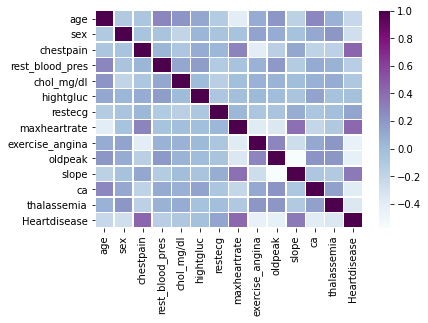

In [10]:
sns.heatmap(cor,linewidths=.5, cmap="BuPu")

Vemos una correlacion positiva entre Heartdisease:
-con slope :el pico del segmento ST en ejercicio.
-con maxheartrate: frecuencia cardíaca máxima alcanzada por la persona.
-con chestpain: Dolor de pecho presentado

# Primero veremos la distribución de población por género

In [11]:
sex_count= heart["sex"].value_counts()
print(sex_count)


1    207
0     96
Name: sex, dtype: int64


In [12]:
gender =sex_count.rename(index={1: "Male" ,0:"Female"})
print(gender)

Male      207
Female     96
Name: sex, dtype: int64


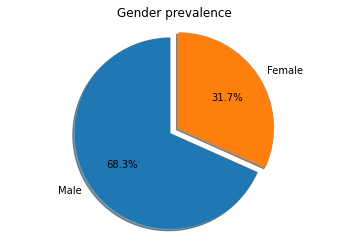

In [13]:
labels = 'Male', 'Female'
sizes = [207,96]
explode = (0, 0.1,)  # hace que sobresalga Female

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels,autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal') 
ax1.set_title("Gender prevalence")
plt.show()

#Edades en estudio por decadas

In [14]:
age_count=heart["age"].value_counts()


In [15]:
bins = [10,20, 30, 40, 50, 60, 70]
labels = list(range(20,80,10))
heart['age_range'] = pd.cut(heart.age, 
                                bins=bins, 
                                labels = labels)
heart.head()

,age,sex,chestpain,rest_blood_pres,chol_mg/dl,hightgluc,restecg,maxheartrate,exercise_angina,oldpeak,slope,ca,thalassemia,Heartdisease,age_range
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,70
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,40
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,50
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,60
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,60


#distribucion de edad por decadas

Text(0.5, 1.0, 'Age prevalence')

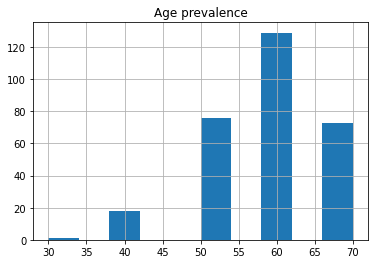

In [16]:
heart['age_range'].hist()
plt.title("Age prevalence")

#Relación de ataques al corazón, en relación con el sexo y dolores de pecho: 

Con esta gráfica podemos ver que la prevalencia de ataques cardíacos se ven precedidos con mucha frecuencia con dolor anginal y con menos frecuencia son asintomáticos. Siendo las mujeres las que padecen de mayor dolor anginal de tipo 1 y 2 antes de un ataque cardíaco.

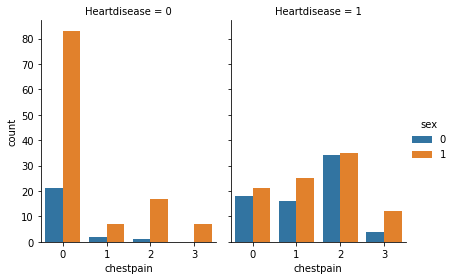

In [17]:
g = sns.catplot(x="chestpain", hue="sex", col="Heartdisease",
                data=heart, kind="count",
                height=4, aspect=.7)

#Relacion chestpain y Heart disease:
Con esta gráfica podemos observar como la mayoría de los ataques cardíacos se ven precedidos de algun tipo de dolor, con prevalencia del dolor no anginal

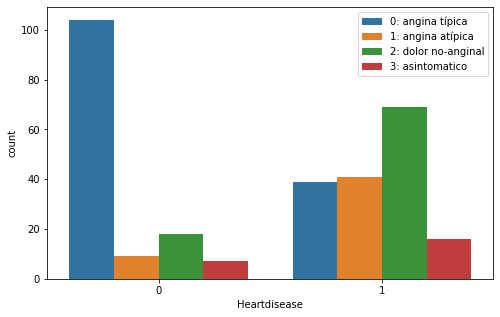

In [18]:
plt.figure(figsize=(8,5))
sns.countplot(x=heart.Heartdisease,hue=heart.chestpain)
plt.legend(labels=['0: angina típica', '1: angina atípica','2: dolor no-anginal','3: asintomatico'])

### Relacion entre Max heart Rate y Heart atack